In [20]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("/content/Placement_Data_Full_Class.csv")

print(df.shape)
df.isna().any()

(215, 15)


sl_no             False
gender            False
ssc_p             False
ssc_b             False
hsc_p             False
hsc_b             False
hsc_s             False
degree_p          False
degree_t          False
workex            False
etest_p           False
specialisation    False
mba_p             False
status            False
salary             True
dtype: bool

Пропуски только в одном столбце: salary

In [7]:
df[df['salary'].isna()]


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
3,4,M,56.0,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
5,6,M,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.0,Others,49.2,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
9,10,M,58.0,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN
12,13,F,47.0,Central,55.0,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,199,F,67.0,Central,70.0,Central,Commerce,65.00,Others,No,88.00,Mkt&HR,71.96,Not Placed,NaN
201,202,M,54.2,Central,63.0,Others,Science,58.00,Comm&Mgmt,No,79.00,Mkt&HR,58.44,Not Placed,NaN
206,207,M,41.0,Central,42.0,Central,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,Not Placed,NaN
208,209,F,43.0,Central,60.0,Others,Science,65.00,Comm&Mgmt,No,92.66,Mkt&HR,62.92,Not Placed,NaN


In [21]:
df.loc[df['salary'].isna(), 'status'].value_counts()

Not Placed    67
Name: status, dtype: int64

In [22]:
print(df["salary"].isna().sum())
df["salary"].fillna(0, inplace = True)
df

67


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


В общем зануляем зарплату в местах где пропуски, так как по видимому фрагменту заметно, что люди без данных о зарплате зачастую имеют статус not placed

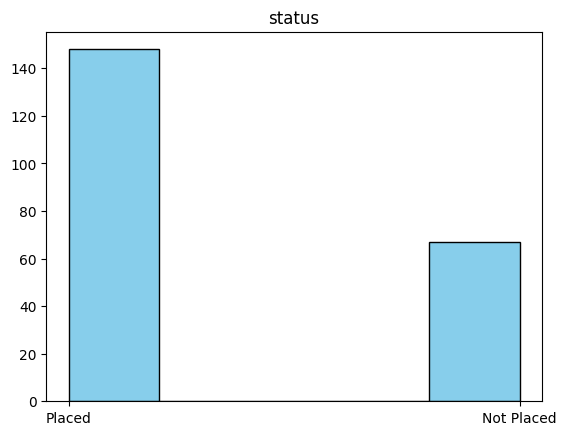

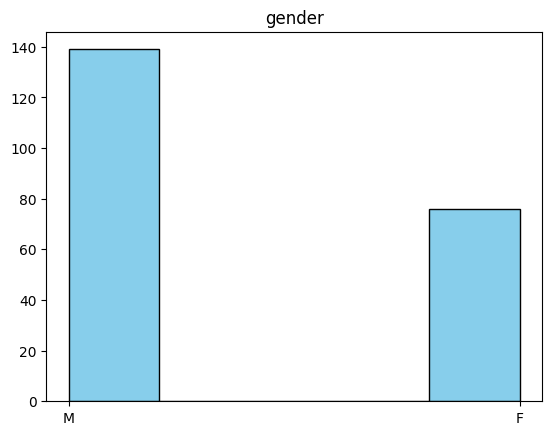

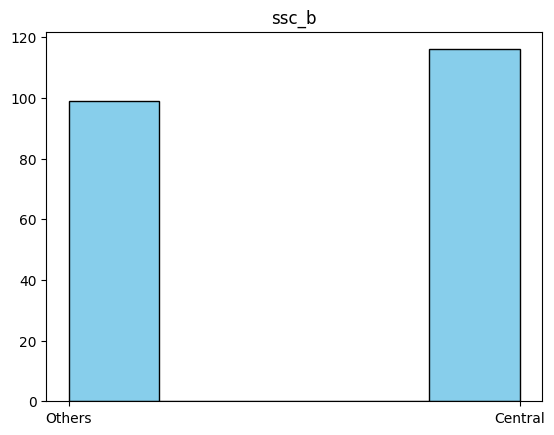

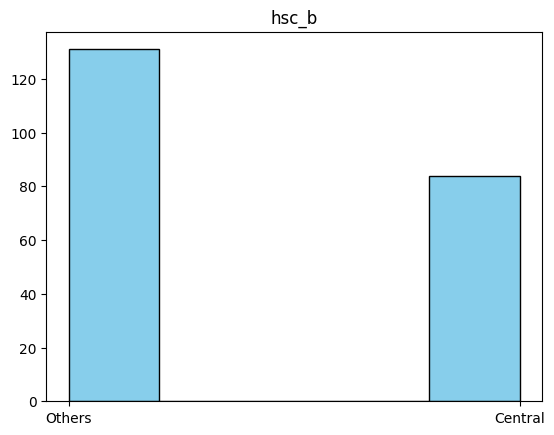

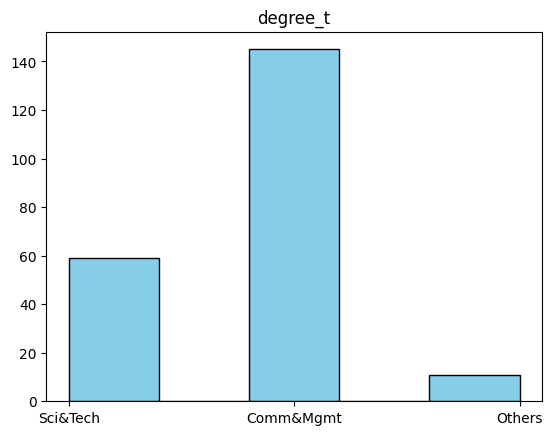

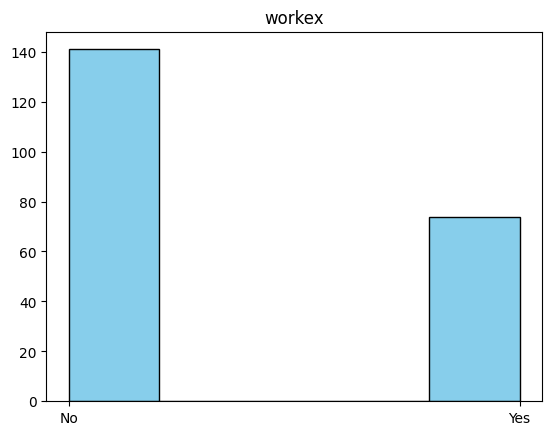

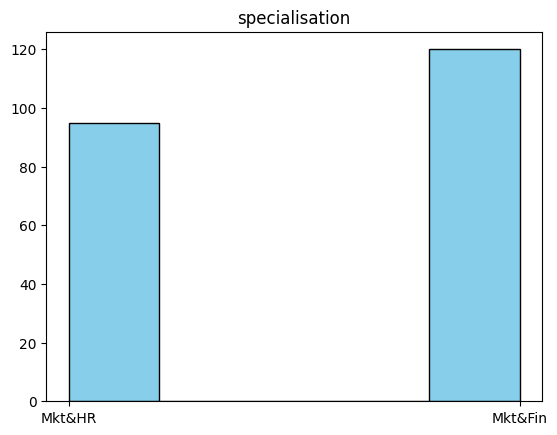

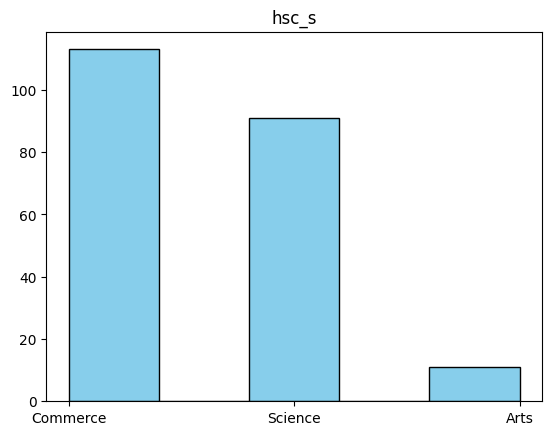

In [23]:
d = df['status']
plt.hist(d, bins=5, color='skyblue', edgecolor='black')
plt.title('status')
plt.show()

d = df['gender']
plt.hist(d, bins=5, color='skyblue', edgecolor='black')
plt.title('gender')
plt.show()

d = df['ssc_b']
plt.hist(d, bins=5, color='skyblue', edgecolor='black')
plt.title('ssc_b')
plt.show()

d = df['hsc_b']
plt.hist(d, bins=5, color='skyblue', edgecolor='black')
plt.title('hsc_b')
plt.show()

d = df['degree_t']
plt.hist(d, bins=5, color='skyblue', edgecolor='black')
plt.title('degree_t')
plt.show()

d = df['workex']
plt.hist(d, bins=5, color='skyblue', edgecolor='black')
plt.title('workex')
plt.show()

d = df['specialisation']
plt.hist(d, bins=5, color='skyblue', edgecolor='black')
plt.title('specialisation')
plt.show()

d = df['hsc_s']
plt.hist(d, bins=5, color='skyblue', edgecolor='black')
plt.title('hsc_s')
plt.show()

Это гистограммы для всех категориальных признаков

In [25]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df['status'])
df['status'] = label_encoder.transform(df['status'])

label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df['gender'])
df['gender'] = label_encoder.transform(df['gender'])

label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df['ssc_b'])
df['ssc_b'] = label_encoder.transform(df['ssc_b'])

label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df['hsc_b'])
df['hsc_b'] = label_encoder.transform(df['hsc_b'])

label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df['degree_t'])
df['degree_t'] = label_encoder.transform(df['degree_t'])

label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df['workex'])
df['workex'] = label_encoder.transform(df['workex'])

label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df['specialisation'])
df['specialisation'] = label_encoder.transform(df['specialisation'])

label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df['hsc_s'])
df['hsc_s'] = label_encoder.transform(df['hsc_s'])

df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0


Мы заменили все категориальные переменные с помощью label encoder

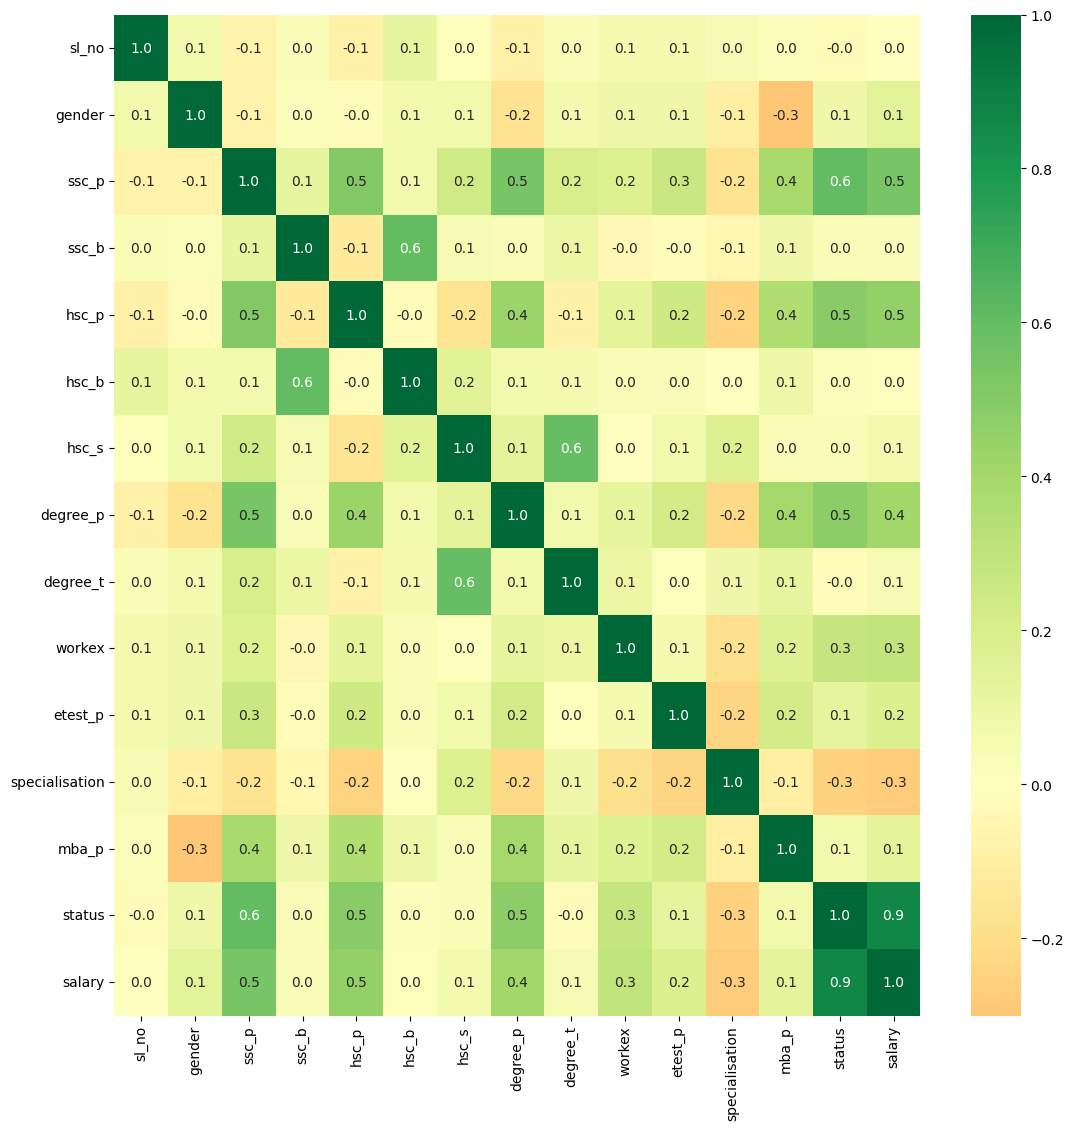

In [29]:
mc = df.corr()
plt.figure(figsize = (13, 13))
sns.heatmap(mc, cmap='RdYlGn', center=0, annot=True, fmt=".1f")
plt.show()

Это матрица корреляции

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,212,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,213,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,214,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


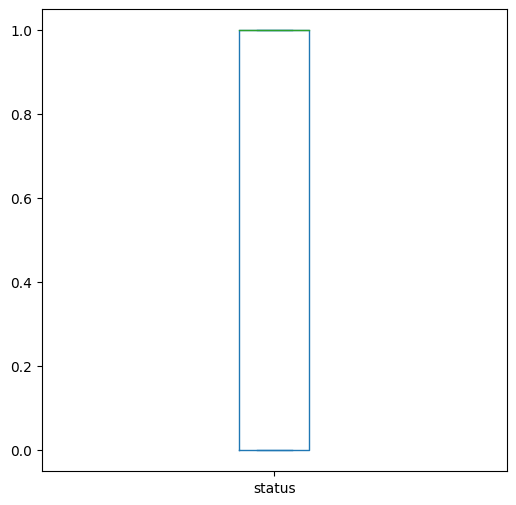

In [ ]:
df['status'].plot.box(return_type='both', figsize=(6,6))
df

Это исследование выбросов

In [33]:
x_train, x_test, y_train, y_test = train_test_split(df[['status', 'sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p', 'degree_t',  'workex', 'etest_p', 'specialisation', 'mba_p', 'status', 'salary']],
                                                    df['status'], test_size=0.3)



Поделили на тренировочную и тестовую части

In [34]:
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train, y_train)
answers_pred = model.predict(x_test)
print(model.coef_)
print(model.intercept_)
print(accuracy_score(y_test, answers_pred))

[[ 1.49339875e-09  1.19617738e-05 -1.39662882e-07 -1.95957676e-06
   3.05738028e-06 -4.43278976e-05  4.18843509e-07 -4.04623520e-06
  -1.88120152e-05 -2.37254322e-06  4.44510611e-07 -9.66574772e-06
   1.14497718e-07 -2.85609310e-05  1.49339875e-09  2.19627174e-04]]
[-21.25121155]
1.0


Мы видим коэффиценты уравнения, свободный член и оценку работы нашей модели

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

confusion_matrix(y_test, answers_pred)

array([[17,  0],
       [ 0, 48]])

In [37]:
tn, fp, fn, tp = confusion_matrix(y_test, answers_pred).ravel()
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)

TN: 17
FP: 0
FN: 0
TP: 48
